Working directory set to: c:\Users\RXCHC\OneDrive\Documents\GitHub\ascent
'ascent' folder added to sys.path: c:\Users\RXCHC\OneDrive\Documents\GitHub\ascent


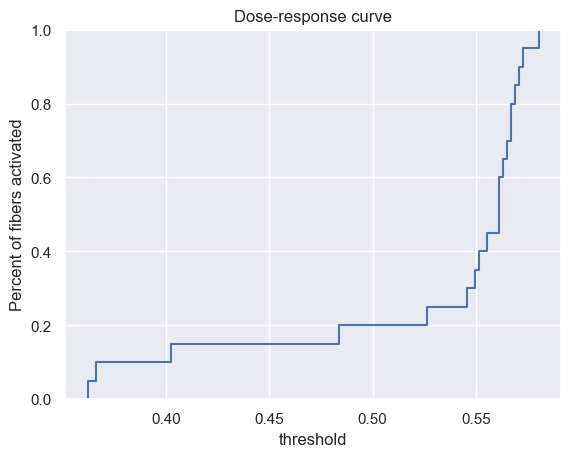

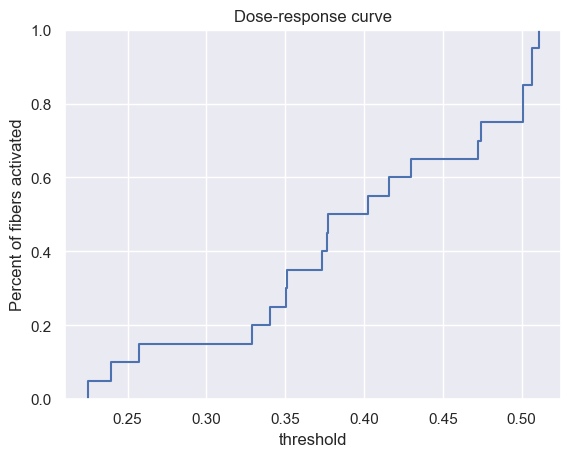

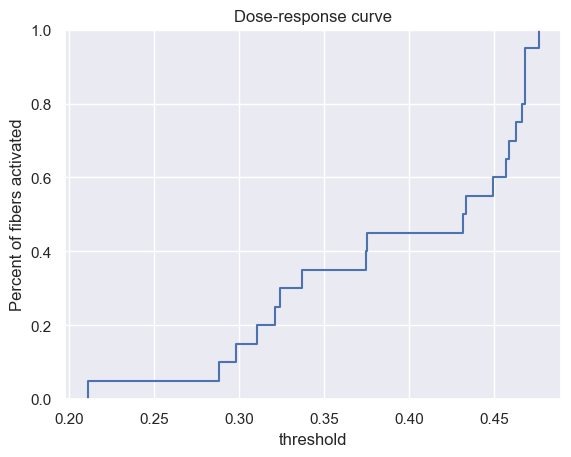

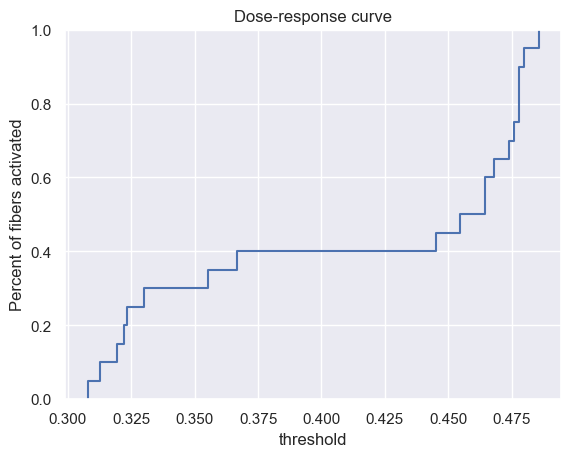

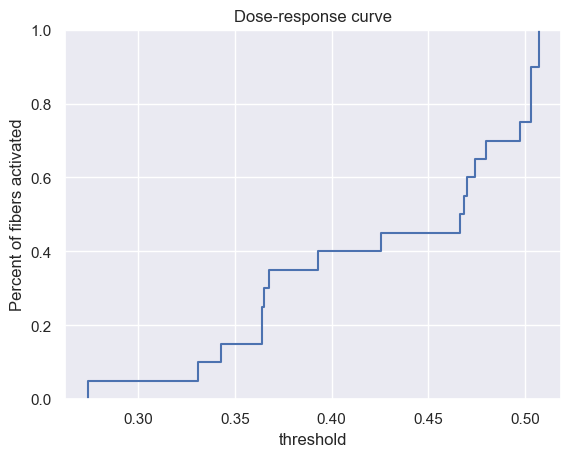

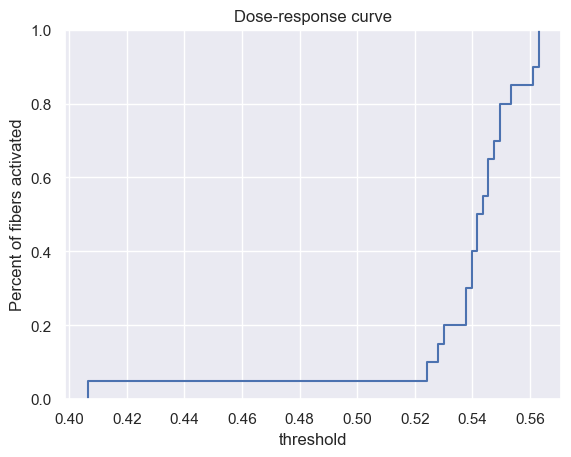

In [2]:
"""Generate a heatmap of activation thresholds.

The copyrights of this software are owned by Duke University.
Please refer to the LICENSE and README.md files for licensing instructions.
The source code can be found on the following GitHub repository: https://github.com/wmglab-duke/ascent.

Note: if more than one heatmap is desired, you must use a Seaborn FacetGrid.
RUN THIS FROM REPOSITORY ROOT
"""

import os
import sys

from notebook_setup import setup_notebook

# Call the setup function
setup_notebook()


import matplotlib.pyplot as plt

from src.core.plotter import heatmaps
from src.core.query import Query
import seaborn as sb
sb.set_theme()

# Initialize and run Querys
q = Query(
    {
        'partial_matches': True,
        'include_downstream': True,
        'indices': {'sample': [2], 'model': [0], 'sim': [3]},
        'model_filters': [lambda m: isinstance(m.get('cuff'), dict)]  # Only use dict-type cuffs
    }
).run()

# Build heatmap
data=q.threshold_data(ignore_missing=True)
# write filter logic particular examing how many n_sim and create a for loop to go through each of them

filtered_data = data[data['threshold'].notna()]
unique_nsim_values = filtered_data['nsim'].unique()
for nsim_value in unique_nsim_values:
    filtered_data2 = filtered_data[filtered_data['nsim'] == nsim_value]
    # heatmaps(data=filtered_data2)
    g = sb.ecdfplot(data=filtered_data2, x='threshold')
    plt.ylabel('Percent of fibers activated')
    plt.title('Dose-response curve')
    plt.show()
    save_directory = os.path.join('out', 'analysis')
    os.makedirs(save_directory, exist_ok=True)
    plt.savefig(os.path.join(save_directory, f'dose_response_curves_{nsim_value}.png'), dpi=400, bbox_inches='tight')
    plt.close()  # Close the figure to free up memory
